<a href="https://colab.research.google.com/github/allauddin111/All_One/blob/master/Linear_Regression_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<p><h2>Machine Learning Assignment</h2><p>
Team 11
</center>
<ol>
  <li>Abhinav Gupta : 01fe19bcs239[ Division : 'D']</li>
  <li>Shrinidhi Kulkarni : 01fe19bcs241[ Division : 'D']</li>
  <li>Avantika Shrivastava : 01fe19bcs253[ Division : 'D']</li>
  <li>Allaudin Khan : 01fe19bcs4 [ Division : 'B']</li>
</ol>

#1. Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
# Setup plotting
from pylab import rcParams
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
import torch.nn as nn

#importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [3]:
#Read data
data = pd.read_csv("/content/11.txt")
data

,X,Y
0,10.761878,19.367176
1,10.463518,18.058657
2,12.811358,20.166199
3,8.130829,17.692481
4,8.970242,17.300556
...,...,...
595,8.788670,16.169065
596,9.263816,20.256789
597,9.620645,19.065420
598,8.722970,16.843582


In [4]:
x = list(map(float,data['X']))
y=list(map(float,data['Y']))

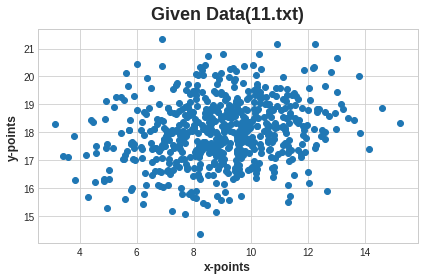

In [5]:
# Plot of Given Data
plt.scatter(x, y)
plt.xlabel('x-points')
plt.ylabel('y-points')
plt.title("Given Data(11.txt)")
plt.show()

Given Dataset has 600 rows and 2 columns : 'X' and 'Y'

In [6]:
#Diving data in 30-70 ration of test-train respectively
X_train, X_test, Y_train, Y_test = train_test_split(data['X'], data['Y'], test_size = 0.3, random_state = 20)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

x = X_train
y = Y_train

No. of training examples: 420
No. of testing examples: 180


#2.Creating Tensor Records

In [7]:
#Arranging the data to assign it to the tensor
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)
 
#creating the tensors
X= torch.Tensor(A)
y= torch.Tensor(b)

#3. Modelling

In [8]:
#Define Model 
model = nn.Linear(1,1)

#Setting Model parameters
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

#loss function
criterion = nn.MSELoss()

#stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #learning rate : 0.01

#Setting no. of iterations(epochs)
iterations = 1001

losses = []

#Fit the model
for i in range (iterations):
 y_pred=model.forward(X)
 loss=criterion(y_pred,y)
 print(f"Epoch {i}: Loss: {loss}")
 losses.append(loss)
 optimizer.zero_grad()
 loss.backward() 
 optimizer.step()

Epoch 0: Loss: 264.4716491699219
Epoch 1: Loss: 138.51956176757812
Epoch 2: Loss: 76.3376235961914
Epoch 3: Loss: 45.63166427612305
Epoch 4: Loss: 30.461891174316406
Epoch 5: Loss: 22.960512161254883
Epoch 6: Loss: 19.244150161743164
Epoch 7: Loss: 17.39602279663086
Epoch 8: Loss: 16.470064163208008
Epoch 9: Loss: 15.999299049377441
Epoch 10: Loss: 15.753233909606934
Epoch 11: Loss: 15.6181058883667
Epoch 12: Loss: 15.53775691986084
Epoch 13: Loss: 15.484475135803223
Epoch 14: Loss: 15.444579124450684
Epoch 15: Loss: 15.411314964294434
Epoch 16: Loss: 15.381352424621582
Epoch 17: Loss: 15.353042602539062
Epoch 18: Loss: 15.325573921203613
Epoch 19: Loss: 15.298547744750977
Epoch 20: Loss: 15.271769523620605
Epoch 21: Loss: 15.245128631591797
Epoch 22: Loss: 15.218591690063477
Epoch 23: Loss: 15.192123413085938
Epoch 24: Loss: 15.165721893310547
Epoch 25: Loss: 15.139371871948242
Epoch 26: Loss: 15.113076210021973
Epoch 27: Loss: 15.08682918548584
Epoch 28: Loss: 15.060637474060059
Epoc

#4. Plotting Epochs(iterations) v/s Loss(error)

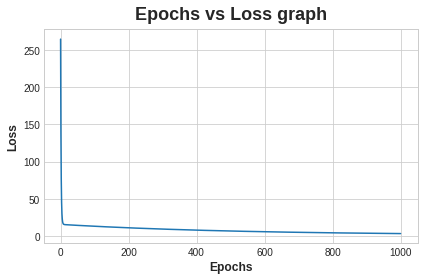

In [9]:
plt.plot(range(iterations),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss graph')
plt.show()

#5. Modelling with different learning rates
We tried to check how our model behaves when there is change in learning rates. Here we tried to learning rate from 0.01 to 0.1

In [10]:
rate=[]
err=[]
all_loss=[]
theta0 = []
theta1 = []
l_rate=0.001
while(l_rate<0.01):
    model = nn.Linear(1,1)
    [a,b] = model.parameters()
    x=np.array(X)
    a = a[0][0].item()
    b = b[0].item()

    criterion = nn.MSELoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)

    iterations = 1000
    losses = []
    for i in range (iterations):
        y_pred=model.forward(X)
        loss=criterion(y_pred,y)
        print(f"Epoch {i}: Loss: {loss}            W:{model.weight.data.item()}                 b:{model.bias.data.item()}")
        losses.append(loss)
        all_loss.append(loss)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        theta0.append(model.weight.data)
        theta1.append(model.bias.data)
    rate.append(l_rate)
    err.append(loss)
    l_rate=l_rate+0.001

Streaming output truncated to the last 5000 lines.
Epoch 0: Loss: 217.1363525390625            W:0.30177056789398193                 b:0.5898507833480835
Epoch 1: Loss: 18.205698013305664            W:1.609494686126709                 b:0.7367193102836609
Epoch 2: Loss: 13.79417896270752            W:1.8032904863357544                 b:0.765060544013977
Epoch 3: Loss: 13.685086250305176            W:1.831421136856079                 b:0.7757710814476013
Epoch 4: Loss: 13.671173095703125            W:1.834913969039917                 b:0.7838564515113831
Epoch 5: Loss: 13.659370422363281            W:1.8347429037094116                 b:0.7915483117103577
Epoch 6: Loss: 13.64763069152832            W:1.8340272903442383                 b:0.7991785407066345
Epoch 7: Loss: 13.635900497436523            W:1.8332310914993286                 b:0.8067965507507324
Epoch 8: Loss: 13.624178886413574            W:1.8324230909347534                 b:0.814409613609314
Epoch 9: Loss: 13.61247253417

##Plotting Loss(Error) for 10 different learning rates

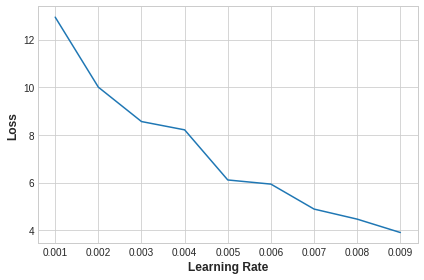

In [11]:
plt.plot(rate,err)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

It was observed that as we increase the learning rate there is decrease in loss

##6.Graph plot of 10 different values for parameters (θ0 andθ1) Vs.Error (cost).

In [12]:
#Setting diff theta0 and theta1 values
list1=[theta0[50].item(),theta0[1000].item(),theta0[2000].item(),theta0[3000].item(),theta0[4000].item(),theta0[5000].item(),theta0[6000].item(),theta0[7000].item(),theta0[8000].item(),theta0[8500].item(),theta0[8999].item()]
list2=[theta1[50].item(),theta1[1000].item(),theta1[2000].item(),theta1[3000].item(),theta1[4000].item(),theta1[5000].item(),theta1[6000].item(),theta1[7000].item(),theta1[8000].item(),theta1[8500].item(),theta1[8999].item()]
list3=[all_loss[50].item(),all_loss[1000].item(),all_loss[2000].item(),all_loss[3000].item(),all_loss[4000].item(),all_loss[5000].item(),all_loss[6000].item(),all_loss[7000].item(),all_loss[8000].item(),all_loss[8500].item(),all_loss[8999].item()]
print(list1)
print(list2)
print(list3)

[1.7845977544784546, 1.5601990222930908, 1.4359115362167358, 1.4040108919143677, 1.1920374631881714, 1.1724799871444702, 1.0465657711029053, 0.9905498027801514, 0.9099095463752747, 0.9099095463752747, 0.9099095463752747]
[1.2638942003250122, 3.3728737831115723, 4.540972709655762, 4.840786457061768, 6.83298921585083, 7.016798496246338, 8.20018482208252, 8.726643562316895, 9.484530448913574, 9.484530448913574, 9.484530448913574]
[15.246006965637207, 565.0770263671875, 682.9297485351562, 230.12796020507812, 217.1363525390625, 474.41937255859375, 661.7385864257812, 454.3734130859375, 633.55322265625, 7.395744323730469, 3.900648355484009]


In [13]:
pd = []
ls = []
for i in range(10):
    pd1 = []
    # for j in x:
    pd.append(list1[i]*x[0]+list2[i])
    ls.append(list3[i])
    # pd.append(pd1)        


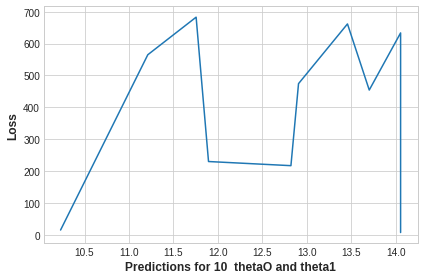

In [14]:
plt.plot(pd,ls)
plt.xlabel('Predictions for 10  thetaO and theta1')
plt.ylabel('Loss')
plt.show()

#7. Early stopping : Gradient descent algorithm 

In [15]:
#Define Model
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#Setting No. of epochs to a very high value
iterations = 10000

losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() 
  optimizer.step()
#stopping condition
  if len(losses)>1 and losses[len(losses)-2]==loss: 
			break

Streaming output truncated to the last 5000 lines.
Epoch 884: Loss: 3.935316324234009
Epoch 885: Loss: 3.930330514907837
Epoch 886: Loss: 3.925354242324829
Epoch 887: Loss: 3.9203877449035645
Epoch 888: Loss: 3.9154300689697266
Epoch 889: Loss: 3.910482406616211
Epoch 890: Loss: 3.905543804168701
Epoch 891: Loss: 3.9006149768829346
Epoch 892: Loss: 3.895695209503174
Epoch 893: Loss: 3.8907852172851562
Epoch 894: Loss: 3.8858838081359863
Epoch 895: Loss: 3.880993127822876
Epoch 896: Loss: 3.8761096000671387
Epoch 897: Loss: 3.8712360858917236
Epoch 898: Loss: 3.8663723468780518
Epoch 899: Loss: 3.8615174293518066
Epoch 900: Loss: 3.8566718101501465
Epoch 901: Loss: 3.8518357276916504
Epoch 902: Loss: 3.847008466720581
Epoch 903: Loss: 3.8421905040740967
Epoch 904: Loss: 3.8373820781707764
Epoch 905: Loss: 3.832582712173462
Epoch 906: Loss: 3.827791929244995
Epoch 907: Loss: 3.8230104446411133
Epoch 908: Loss: 3.8182382583618164
Epoch 909: Loss: 3.8134748935699463
Epoch 910: Loss: 3.8087

In [16]:
print("training_cost:",loss.item())

training_cost: 1.3137654066085815
